# Análise de Índices Macroeconômicos para Sugestionamento de Pilar de Investimento

## Instalação/Referência de bibliotecas utilizadas

In [1]:
!pip install pandas
!pip install seaborn --upgrade
!pip install sklearn --upgrade
!pip install scikit-learn --upgrade
!pip install plotly --upgrade
!pip install -U kaleido
!pip install yellowbrick

In [2]:
#Bibliotecas padrão
import numpy as np
import pandas as pd

#Bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Preparação dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Bibliotecas de Algoritmos
from sklearn.tree import DecisionTreeClassifier #Árvore de decisão
from sklearn.ensemble import RandomForestClassifier #Random Forest 
from sklearn.neighbors import KNeighborsClassifier #kNN

#Avaliação de algoritmo
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Configurando as bibliotecas
##Seaborn
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,5)})
##Pandas - Mostrar todas as colunas do Dataframe
pd.set_option("display.max_columns", None)

## Importação e tratativa inicial dos dados

In [3]:
def importaInvesting(df_resultado, nomemetrica):
    #Padronizando a nomenclatura das colunas
    df_resultado.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : nomemetrica}, inplace = True)

    #Removendo colunas desnecessárias
    df_resultado.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

    #Padronizando a coluna DATA_PREGAO
    df_resultado['DATA_PREGAO'] = df_resultado['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
    df_resultado['DATA_PREGAO'] = pd.to_datetime(df_resultado['DATA_PREGAO'], format="%d/%m/%Y")

    #Padronizando a coluna de valor
    df_resultado[nomemetrica] = df_resultado[nomemetrica].apply(lambda x: x.replace('.', '').replace(',', '.'))
    df_resultado[nomemetrica] = pd.to_numeric(df_resultado[nomemetrica], downcast='float')

    #Criando índice
    df_resultado.set_index('DATA_PREGAO', inplace=True)
    return df_resultado

### Taxas

#### Taxa Selic

In [4]:
selic = pd.read_csv('dados/Selic.csv',sep=';')

In [5]:
selic.dtypes

Data     object
Valor    object
dtype: object

In [6]:
selic.head(1)

Data Valor
0  01/01/2010  8,75

In [7]:
#Padronizando a nomenclatura das colunas
selic.rename(columns={'Data' : 'DATA_PREGAO', 'Valor' : 'SELIC'}, inplace = True)

#Padronizando a coluna DATA_PREGAO
selic['DATA_PREGAO'] = pd.to_datetime(selic['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
selic['SELIC'] = selic['SELIC'].apply(lambda x: x.replace(',', '.'))
selic['SELIC'] = pd.to_numeric(selic['SELIC'], downcast='float')

#Criando índice
selic.set_index('DATA_PREGAO', inplace=True)

In [8]:
selic.dtypes, type(selic.index)

(SELIC    float32
 dtype: object,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [9]:
selic.head(1)

SELIC
DATA_PREGAO       
2010-01-01    8.75

#### Taxa Câmbio: Dólar

In [10]:
dolar = pd.read_csv('dados/Dolar.csv', sep=';',dtype='str')

In [11]:
dolar.dtypes

DATA       object
COLUNA1    object
COLUNA2    object
TIPO       object
COMPRA     object
VENDA      object
COLUNA3    object
COLUNA4    object
COLUNA5    object
dtype: object

In [12]:
dolar.head(1)

DATA COLUNA1 COLUNA2 TIPO  COMPRA   VENDA COLUNA3 COLUNA4 COLUNA5
0  04012010     220       A  USD  1,7232  1,7240  1,0000  1,0000     NaN

In [13]:
#Padronizando a nomenclatura das colunas
dolar.rename(columns={'DATA' : 'DATA_PREGAO', 'COMPRA' : 'DOLAR'}, inplace = True)

#Removendo colunas desnecessárias
dolar.drop(['COLUNA1', 'COLUNA2', 'TIPO', 'VENDA', 'COLUNA3', 'COLUNA4', 'COLUNA5'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
dolar['DATA_PREGAO'] = dolar['DATA_PREGAO'].apply(lambda x: x[0:2] + '/' + x[2:4] + '/' + x[4:])
dolar['DATA_PREGAO'] = pd.to_datetime(dolar['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
dolar['DOLAR'] = dolar['DOLAR'].apply(lambda x: x.replace(',', '.'))
dolar['DOLAR'] = pd.to_numeric(dolar['DOLAR'], downcast='float')

#Criando índice
dolar.set_index('DATA_PREGAO', inplace=True)

In [14]:
dolar.dtypes, type(dolar.index)

(DOLAR    float32
 dtype: object,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [15]:
dolar.head(1)

DOLAR
DATA_PREGAO        
2010-01-04   1.7232

### Commodities

#### Minério de Ferro Refinado

In [16]:
ferro = pd.read_csv('dados/Minerio_Ferro.csv', sep=',')

In [17]:
ferro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [18]:
ferro.head(1)

Data  Último Abertura  Máxima  Mínima Vol.   Var%
0  31.12.2020  155,84   155,84  155,84  155,84    -  0,09%

In [19]:
ferro = importaInvesting(ferro, "FERRO")

In [20]:
ferro.dtypes, type(ferro.index)

(FERRO    float32
 dtype: object,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [21]:
ferro.head(1)

FERRO
DATA_PREGAO            
2020-12-31   155.839996

#### Petróleo Brent Futuros

In [22]:
petroleo = pd.read_csv('dados/Petroleo_Brent.csv', sep=',')

In [23]:
petroleo.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [24]:
petroleo.head(1)

Data Último Abertura Máxima Mínima     Vol.   Var%
0  31.12.2020  51,80    51,49  51,84  50,90  133,22K  0,90%

In [25]:
petroleo = importaInvesting(petroleo, "PETROLEO")

In [26]:
petroleo.dtypes

PETROLEO    float32
dtype: object

In [27]:
petroleo.head(1)

PETROLEO
DATA_PREGAO           
2020-12-31   51.799999

#### Ouro

In [28]:
ouro = pd.read_csv('dados/Ouro.csv', sep=',')

In [29]:
ouro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [30]:
ouro.head(1)

Data    Último  Abertura    Máxima    Mínima   Vol.   Var%
0  31.12.2020  1.905,80  1.910,00  1.915,20  1.902,90  0,73K  0,09%

In [31]:
ouro = importaInvesting(ouro, "OURO")

In [32]:
ouro.dtypes

OURO    float32
dtype: object

In [33]:
ouro.head(1)

OURO
DATA_PREGAO             
2020-12-31   1905.800049

### Índices

#### Índice Bovespa

In [34]:
bovespa = pd.read_csv('dados/Indice_Bovespa.csv')

In [35]:
bovespa.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [36]:
bovespa.head(1)

Date     Open     High      Low    Close  Adj Close     Volume
0  2010-01-04  68587.0  70081.0  68587.0  70045.0    70045.0  1655400.0

In [37]:
#Padronizando a nomenclatura das colunas
bovespa.rename(columns={'Date' : 'DATA_PREGAO', 'Close' : 'BOVESPA'}, inplace = True)

#Removendo colunas desnecessárias
bovespa.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
bovespa['DATA_PREGAO'] = pd.to_datetime(bovespa['DATA_PREGAO'])

#Padronizando a coluna de VALOR
bovespa['BOVESPA'] = bovespa['BOVESPA'].apply(lambda x: float(x))  

#Criando índice
bovespa.set_index('DATA_PREGAO', inplace=True)

In [38]:
bovespa.dtypes

BOVESPA    float64
dtype: object

In [39]:
bovespa.head(1)

BOVESPA
DATA_PREGAO         
2010-01-04   70045.0

#### Índice S&P 500

In [40]:
sp500 = pd.read_csv('dados/Indice_S&P500.csv')

In [41]:
sp500.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [42]:
sp500.head(1)

Data    Último  Abertura    Máxima    Mínima Vol.   Var%
0  31.12.2020  3.756,07  3.733,27  3.760,20  3.726,88    -  0,64%

In [43]:
#Padronizando a nomenclatura das colunas
sp500.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'SP500'}, inplace = True)

#Removendo colunas desnecessárias
sp500.drop(['Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
sp500['DATA_PREGAO'] = sp500['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
sp500['DATA_PREGAO'] = pd.to_datetime(sp500['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de VALOR
sp500['SP500'] = sp500['SP500'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))  

#Criando índice
sp500.set_index('DATA_PREGAO', inplace=True)

In [44]:
sp500.dtypes

SP500    float64
dtype: object

In [45]:
sp500.head(1)

SP500
DATA_PREGAO         
2020-12-31   3756.07

### Ações

In [46]:
def importaAcoes(df_resultado, nomemetrica):
    #Padronizando a nomenclatura das colunas
    df_resultado.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : nomemetrica}, inplace = True)

    #Removendo colunas desnecessárias
    df_resultado.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

    #Padronizando a coluna DATA_PREGAO
    df_resultado['DATA_PREGAO'] = df_resultado['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
    df_resultado['DATA_PREGAO'] = pd.to_datetime(df_resultado['DATA_PREGAO'], format="%d/%m/%Y")

    #Padronizando a coluna de valor
    df_resultado[nomemetrica] = df_resultado[nomemetrica].apply(lambda x: x.replace(',', '.'))
    df_resultado[nomemetrica] = pd.to_numeric(df_resultado[nomemetrica], downcast='float')

    #Criando índice
    df_resultado.set_index('DATA_PREGAO', inplace=True)
    return df_resultado

#### VALE3 - VALE

In [47]:
vale = pd.read_csv('dados/vale3.csv')

In [48]:
vale.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [49]:
vale.head(1)

Data Último Abertura Máxima Mínima    Vol.   Var%
0  30.12.2020  87,45    87,19  87,59  86,65  30,10M  0,44%

In [50]:
vale = importaAcoes(vale, "VALE")

In [51]:
vale.dtypes

VALE    float32
dtype: object

In [52]:
vale.head(1)

VALE
DATA_PREGAO           
2020-12-30   87.449997

#### ITUB4 - ITAU UNIBANCO

In [53]:
itub = pd.read_csv('dados/itub4.csv')

In [54]:
itub.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [55]:
itub.head(1)

Data Último Abertura Máxima Mínima    Vol.    Var%
0  30.12.2020  31,14    31,70  31,83  31,14  25,64M  -1,46%

In [56]:
itub = importaAcoes(itub, "ITUB")

In [57]:
itub.dtypes

ITUB    float32
dtype: object

In [58]:
itub.head(1)

ITUB
DATA_PREGAO           
2020-12-30   31.139999

#### PETR4 - PETROBRÁS

In [59]:
petr4 = pd.read_csv('dados/petr4.csv')

In [60]:
petr4.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [61]:
petr4.head(1)

Data Último Abertura Máxima Mínima    Vol.   Var%
0  30.12.2020  28,34    28,35  28,49  28,20  36,97M  0,25%

In [62]:
petr4 = importaAcoes(petr4, "PETR4")

In [63]:
petr4.dtypes

PETR4    float32
dtype: object

In [64]:
petr4.head(1)

PETR4
DATA_PREGAO       
2020-12-30   28.34

#### BBDC4 - BRADESCO

In [65]:
bbdc4 = pd.read_csv('dados/bbdc4.csv')

In [66]:
bbdc4.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [67]:
bbdc4.head(1)

Data Último Abertura Máxima Mínima    Vol.    Var%
0  30.12.2020  24,58    25,02  25,12  24,58  24,24M  -1,42%

In [68]:
bbdc4 = importaAcoes(bbdc4, "BBDC4")

In [69]:
bbdc4.dtypes

BBDC4    float32
dtype: object

In [70]:
bbdc4.head(1)

BBDC4
DATA_PREGAO       
2020-12-30   24.58

#### B3SA3 - B3 SA

In [71]:
b3 = pd.read_csv('dados/b3sa3.csv')

In [72]:
b3.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [73]:
b3.head(1)

Data Último Abertura Máxima Mínima    Vol.   Var%
0  30.12.2020  20,06    20,03  20,12  19,93  45,15M  0,26%

In [74]:
b3 = importaAcoes(b3, "B3")

In [75]:
b3.dtypes

B3    float32
dtype: object

In [76]:
b3.head(1)

B3
DATA_PREGAO           
2020-12-30   20.059999

## Unindo os Datasets

In [77]:
# Exportando os datasets de entrada
sp500.to_csv('saida/01_sp500.csv')
bovespa.to_csv('saida/01_bovespa.csv')
ouro.to_csv('saida/01_ouro.csv')
petroleo.to_csv('saida/01_petroleo.csv')
ferro.to_csv('saida/01_ferro.csv')
dolar.to_csv('saida/01_dolar.csv')
selic.to_csv('saida/01_selic.csv')

In [78]:
sp500.count(), bovespa.count(), ouro.count(), petroleo.count(), ferro.count(), dolar.count(), selic.count(), vale.count()

(SP500    2769
 dtype: int64,
 BOVESPA    2718
 dtype: int64,
 OURO    2861
 dtype: int64,
 PETROLEO    2841
 dtype: int64,
 FERRO    2554
 dtype: int64,
 DOLAR    2763
 dtype: int64,
 SELIC    4018
 dtype: int64,
 VALE    2721
 dtype: int64)

In [79]:
#Verificando a contagem dos pregões por indicador foi verificado que o Minério de Ferro não tem tantos pregões disponíveis para o ano de 2010
sp500.groupby(sp500.index.year).agg({'count'}).join(bovespa.groupby(bovespa.index.year).agg({'count'})).join(ouro.groupby(ouro.index.year).agg({'count'})).join(petroleo.groupby(petroleo.index.year).agg({'count'})).join(ferro.groupby(ferro.index.year).agg({'count'})).join(dolar.groupby(dolar.index.year).agg({'count'})).join(selic.groupby(selic.index.year).agg({'count'})).join(vale.groupby(vale.index.year).agg({'count'}))

SP500 BOVESPA  OURO PETROLEO FERRO DOLAR SELIC  VALE
            count   count count    count count count count count
DATA_PREGAO                                                     
2010          252     247   252      259    48   251   365   247
2011          252     249   252      258   247   251   365   249
2012          250     244   252      258   250   251   366   246
2013          252     248   256      258   248   253   365   248
2014          252     248   262      259   250   253   365   248
2015          252     246   264      258   251   250   365   246
2016          252     249   265      258   252   251   366   249
2017          251     248   264      258   251   249   365   246
2018          251     245   264      258   252   250   365   245
2019          252     247   265      258   252   253   365   248
2020          253     247   265      259   253   251   366   249

In [80]:
#O Minério de Ferro só apresenta dados a partir de 25/10/2010
ferro.index.min()

Timestamp('2010-10-25 00:00:00')

In [81]:
# Unindo todos os arquivos importados: sp500, bovespa, ouro, petroleo, ferro, dolar, selic
df = sp500.join(bovespa, how="inner")
df = df.join(ouro, how="inner")
df = df.join(petroleo, how="inner")
df = df.join(ferro, how="inner")
df = df.join(dolar, how="inner")
df = df.join(selic, how="inner")
df = df.join(vale, how="inner")

#Ordenar dataframe pelo indice
df.sort_index(axis=0, ascending=True, inplace=True)

In [82]:
#Organizando o index para auxiliar no calculo de métricas complementares
df

SP500   BOVESPA         OURO   PETROLEO       FERRO   DOLAR  \
DATA_PREGAO                                                                  
2010-10-25   1185.62   69580.0  1338.300049  83.540001  145.000000  1.7018   
2010-10-26   1185.64   70740.0  1338.000000  83.660004  145.100006  1.7037   
2010-10-27   1182.45   70569.0  1322.199951  83.230003  144.500000  1.7069   
2010-10-28   1183.78   70320.0  1342.099976  83.589996  144.000000  1.7104   
2010-10-29   1183.26   70673.0  1357.099976  83.150002  147.500000  1.7006   
...              ...       ...          ...        ...         ...     ...   
2020-12-22   3687.26  116348.0  1880.000000  50.080002  154.490005  5.1467   
2020-12-23   3690.01  117857.0  1887.599976  51.200001  154.500000  5.1734   
2020-12-28   3735.36  119051.0  1890.800049  50.860001  155.350006  5.2384   
2020-12-29   3727.04  119475.0  1893.400024  51.090000  155.570007  5.1936   
2020-12-30   3732.04  119306.0  1904.000000  51.340000  155.699997  5.1961   

             SELIC       VALE  
DATA_PREGAO                    
2010-10-25   10.75  49.880001  
2010-10-26   10.75  50.610001  
2010-10-27   10.75  50.099998  
2010-10-28   10.75  49.139999  
2010-10-29   10.75  49.139999  
...            ...        ...  
2020-12-22    2.00  86.940002  
2020-12-23    2.00  87.360001  
2020-12-28    2.00  87.309998  
2020-12-29    2.00  87.070000  
2020-12-30    2.00  87.449997  

[2440 rows x 8 columns]

In [83]:
#Verificação de valores nulos nos itens do dataset
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["OURO"].hasnans, df["PETROLEO"].hasnans

(False, True, False, False)

In [84]:
df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans, df["VALE"].hasnans

(False, False, False, False)

In [85]:
#Dias em que os dados do Bovespa não foram informados
#Foi constatado que se tratam da quarta-feira de cinzas em que os demais indicadores tem cotação por não serem negociados na B3
df.query("BOVESPA.isnull()")

SP500  BOVESPA         OURO   PETROLEO      FERRO   DOLAR  \
DATA_PREGAO                                                                
2018-02-14   2698.63      NaN  1452.900024  64.360001  76.669998  3.2531   
2019-03-06   2771.45      NaN  1346.500000  65.989998  85.790001  3.8297   
2020-02-26   3116.39      NaN  1678.199951  53.430000  86.669998  4.4353   

             SELIC       VALE  
DATA_PREGAO                    
2018-02-14    6.75  42.779999  
2019-03-06    6.50  44.930000  
2020-02-26    4.25  43.529999

Devido a não haver negociações na B3 em feriados, a listagem abaixo justifica os dias em que apareceram como nulo no dataset:
- 2020-02-26: Quarta-feira de cinzas
- 2019-03-06: Quarta-feira de cinzas
- 2018-02-14: Quarta-feira de cinzas

In [86]:
df.shape

(2440, 8)

In [87]:
#Por se tratarem de poucos dias e em que não há negociação na B3 em são paulo vamos remover estas datas
df.dropna(subset = ["BOVESPA"], inplace=True) 

#Verificando seainda há valores nulos no dataframe
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["OURO"].hasnans, df["PETROLEO"].hasnans

(False, False, False, False)

In [88]:
df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans, df["VALE"].hasnans

(False, False, False, False)

In [89]:
#Verificando métricas com valores zerados
df.query("SP500 == 0").SP500.count(), df.query("BOVESPA == 0").BOVESPA.count(), df.query("OURO == 0").OURO.count()

(0, 0, 0)

In [90]:
#Verificando métricas com valores zerados
df.query("PETROLEO == 0").PETROLEO.count(), df.query("FERRO == 0").FERRO.count(), df.query("DOLAR == 0").DOLAR.count()

(0, 0, 0)

In [91]:
df.query("SELIC == 0").SELIC.count(), df.query("VALE == 0").VALE.count()

(0, 0)

In [92]:
#Verificando chaves duplicadas no dataframe
df.index.duplicated().sum()

0

In [93]:
df.head(5)

SP500  BOVESPA         OURO   PETROLEO       FERRO   DOLAR  \
DATA_PREGAO                                                                 
2010-10-25   1185.62  69580.0  1338.300049  83.540001  145.000000  1.7018   
2010-10-26   1185.64  70740.0  1338.000000  83.660004  145.100006  1.7037   
2010-10-27   1182.45  70569.0  1322.199951  83.230003  144.500000  1.7069   
2010-10-28   1183.78  70320.0  1342.099976  83.589996  144.000000  1.7104   
2010-10-29   1183.26  70673.0  1357.099976  83.150002  147.500000  1.7006   

             SELIC       VALE  
DATA_PREGAO                    
2010-10-25   10.75  49.880001  
2010-10-26   10.75  50.610001  
2010-10-27   10.75  50.099998  
2010-10-28   10.75  49.139999  
2010-10-29   10.75  49.139999

In [94]:
df.shape

(2437, 8)

In [95]:
df.describe()

SP500        BOVESPA         OURO     PETROLEO        FERRO  \
count  2437.000000    2437.000000  2437.000000  2437.000000  2437.000000   
mean   2155.457702   67993.908904  1446.857178    76.395676    99.143753   
std     642.035354   19107.717846   193.742157    27.872543    37.968433   
min    1099.230000   37497.000000  1108.099976    19.990000    38.540001   
25%    1615.410000   53737.000000  1307.400024    51.900002    66.860001   
50%    2081.340000   61673.000000  1379.699951    67.519997    91.570000   
75%    2706.530000   79065.000000  1579.300049   107.489998   130.809998   
max    3735.360000  119528.000000  2103.199951   126.650002   188.899994   

             DOLAR        SELIC         VALE  
count  2437.000000  2437.000000  2437.000000  
mean      3.070693     9.323759    36.480328  
std       1.054220     3.455287    13.510456  
min       1.533700     2.000000     8.600000  
25%       2.098000     6.500000    26.900000  
50%       3.159700     9.750000    37.000000  
75%       3.791500    12.000000    46.580002  
max       5.936600    14.250000    87.800003

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2437 entries, 2010-10-25 to 2020-12-30
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SP500     2437 non-null   float64
 1   BOVESPA   2437 non-null   float64
 2   OURO      2437 non-null   float32
 3   PETROLEO  2437 non-null   float32
 4   FERRO     2437 non-null   float32
 5   DOLAR     2437 non-null   float32
 6   SELIC     2437 non-null   float32
 7   VALE      2437 non-null   float32
dtypes: float32(6), float64(2)
memory usage: 178.8 KB


## Exploração dos dados

### Verificando Outliers

#### SP500

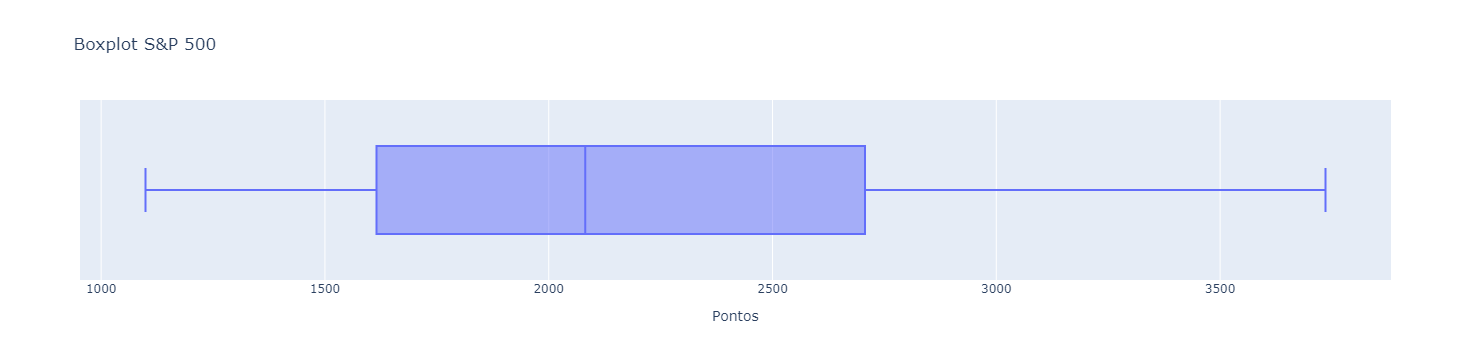

In [97]:
#Verificando os quartis do valor
fig = px.box(df, x="SP500", title="Boxplot S&P 500")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

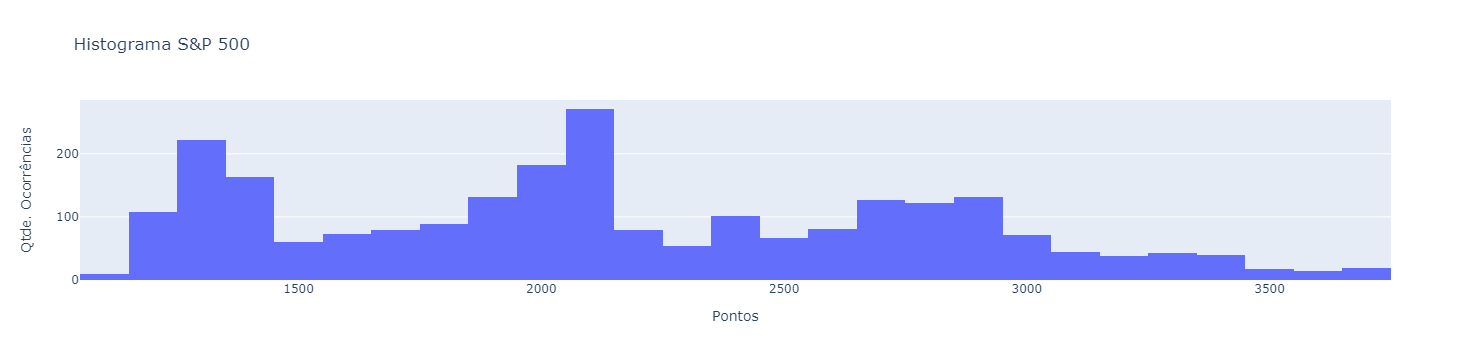

In [98]:
#Verificando range de valores
fig = px.histogram(df, x="SP500", title='Histograma S&P 500')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

#### BOVESPA

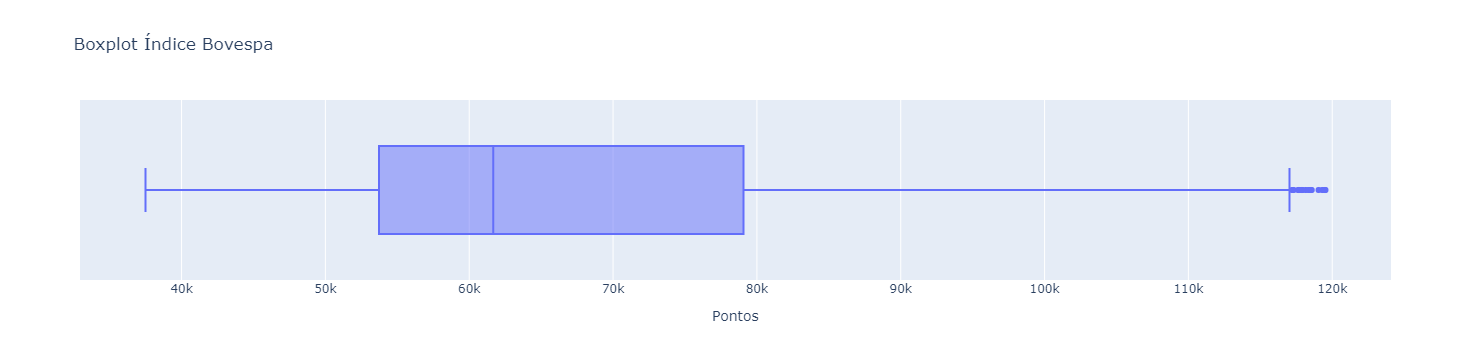

In [99]:
fig = px.box(df, x="BOVESPA", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

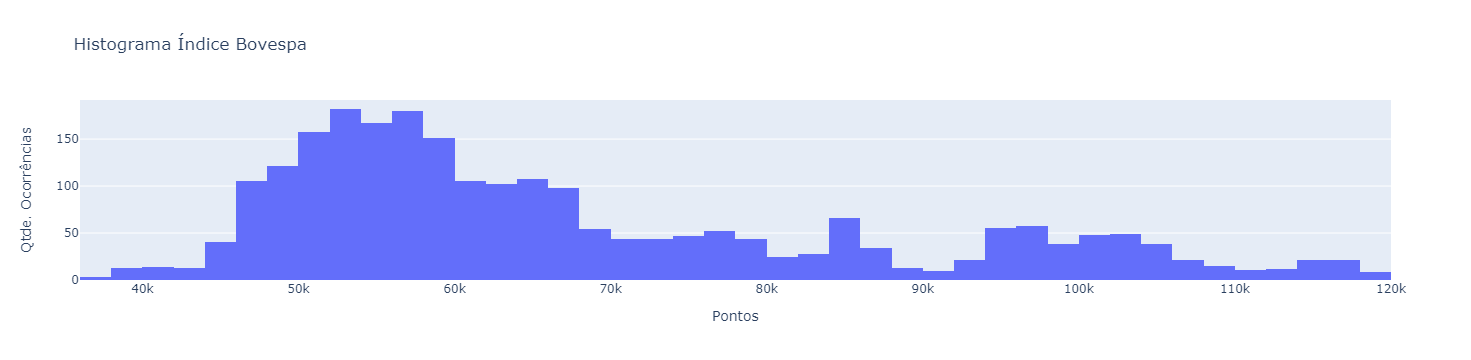

In [100]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA", title='Histograma Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

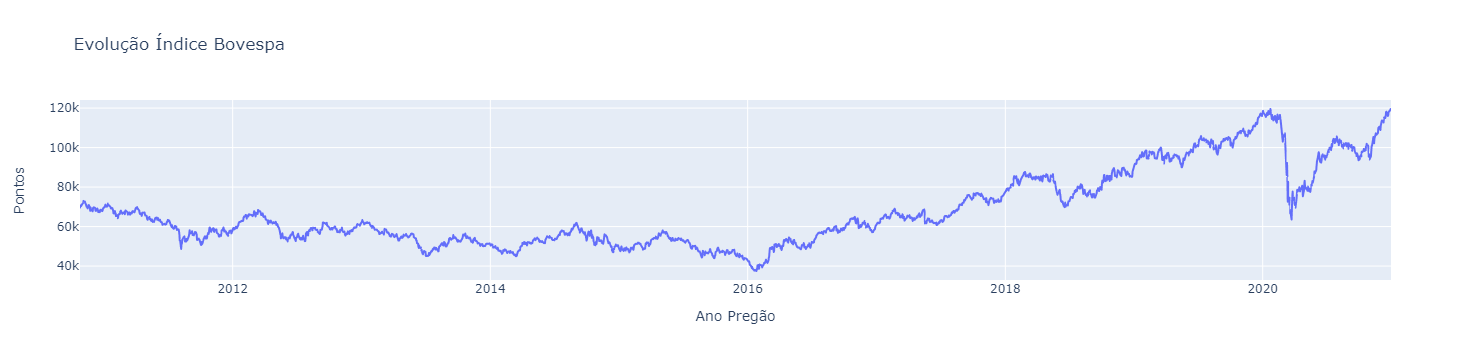

In [101]:
#Verificar período de pico do Índice Bovespa
fig = px.line(df, x=df.index, y="BOVESPA", title='Evolução Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Ano Pregão")
fig.show()

In [102]:
np.unique(df.query("BOVESPA > 117026").index.year), np.count_nonzero(np.unique(df.query("BOVESPA > 117026").index.date)), df.query("BOVESPA > 117026").index.date

(array([2019, 2020], dtype=int64),
 16,
 array([datetime.date(2019, 12, 26), datetime.date(2020, 1, 2),
        datetime.date(2020, 1, 3), datetime.date(2020, 1, 13),
        datetime.date(2020, 1, 14), datetime.date(2020, 1, 17),
        datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
        datetime.date(2020, 1, 24), datetime.date(2020, 12, 16),
        datetime.date(2020, 12, 17), datetime.date(2020, 12, 18),
        datetime.date(2020, 12, 23), datetime.date(2020, 12, 28),
        datetime.date(2020, 12, 29), datetime.date(2020, 12, 30)],
       dtype=object))

#### OURO


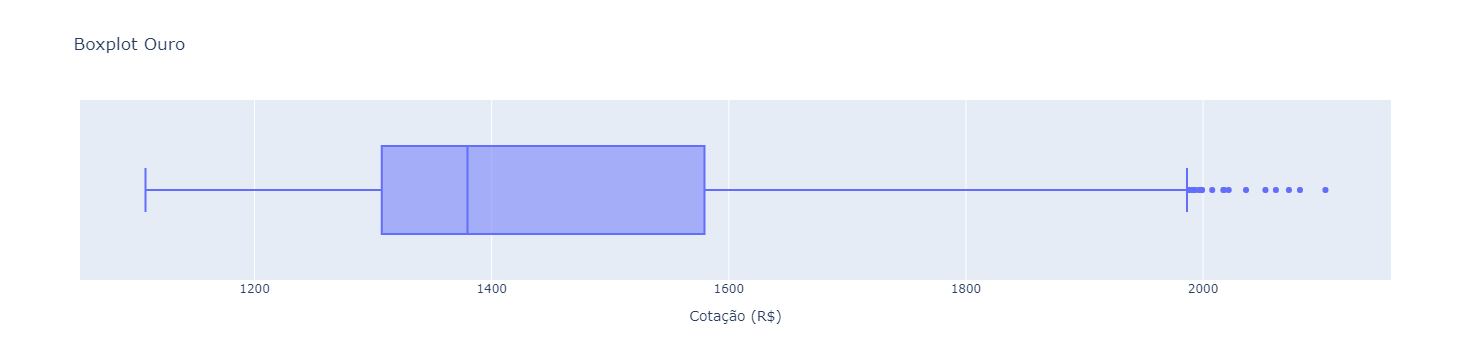

In [103]:
fig = px.box(df, x="OURO", title="Boxplot Ouro")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

In [104]:
#Geralmente a busca pelo ouro decorre da busca de aplicações consideradas mais seguras como metais preciosos
np.unique(df.query("OURO > 1986.4").index.year), np.unique(df.query("OURO > 1986.4").index), np.count_nonzero(np.unique(df.query("OURO > 1986.4").index.date))

(array([2020], dtype=int64),
 array(['2020-07-27T00:00:00.000000000', '2020-07-28T00:00:00.000000000',
        '2020-07-29T00:00:00.000000000', '2020-07-30T00:00:00.000000000',
        '2020-07-31T00:00:00.000000000', '2020-08-03T00:00:00.000000000',
        '2020-08-04T00:00:00.000000000', '2020-08-05T00:00:00.000000000',
        '2020-08-06T00:00:00.000000000', '2020-08-07T00:00:00.000000000',
        '2020-08-10T00:00:00.000000000', '2020-08-13T00:00:00.000000000',
        '2020-08-17T00:00:00.000000000', '2020-08-18T00:00:00.000000000',
        '2020-08-19T00:00:00.000000000', '2020-08-28T00:00:00.000000000',
        '2020-08-31T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
        '2020-09-16T00:00:00.000000000'], dtype='datetime64[ns]'),
 19)

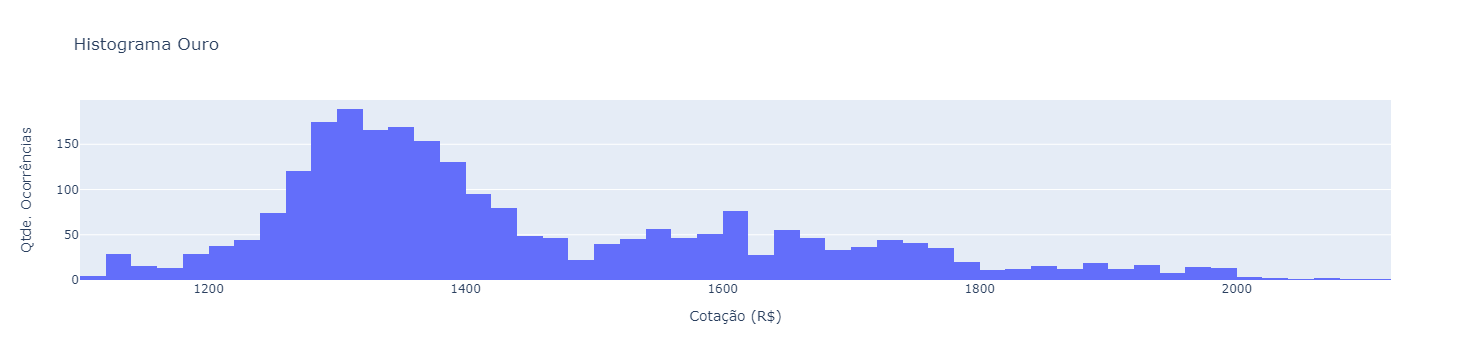

In [105]:
#Verificando range de valores
fig = px.histogram(df, x="OURO", title='Histograma Ouro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

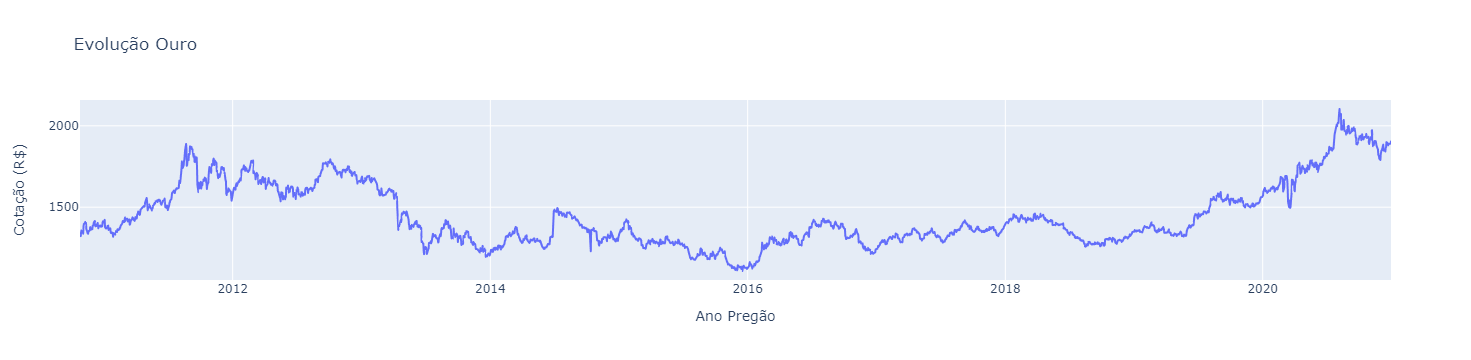

In [106]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="OURO", title='Evolução Ouro')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Ano Pregão")
fig.show()

#### PETROLEO

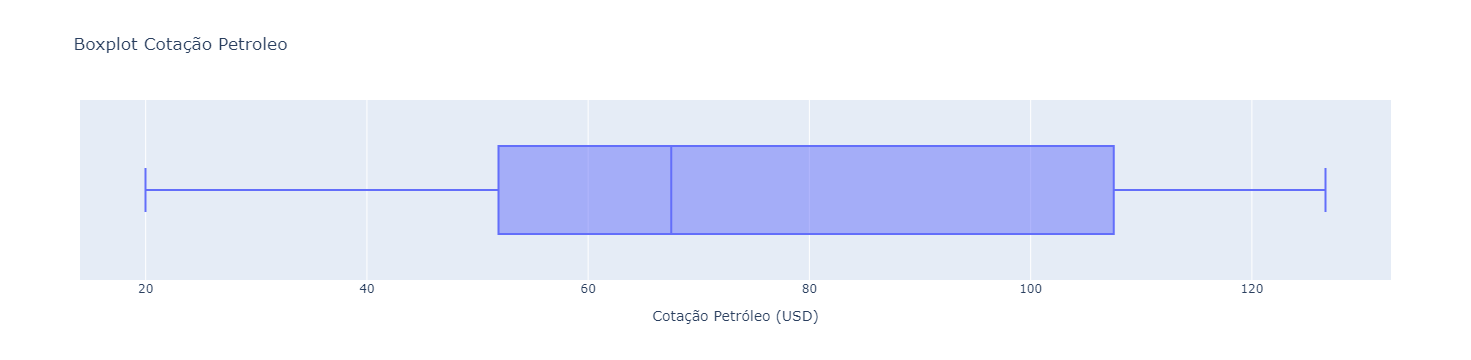

In [107]:
fig = px.box(df, x="PETROLEO", title="Boxplot Cotação Petroleo")
fig.update_layout(showlegend=True, xaxis_title="Cotação Petróleo (USD)")
fig.show()

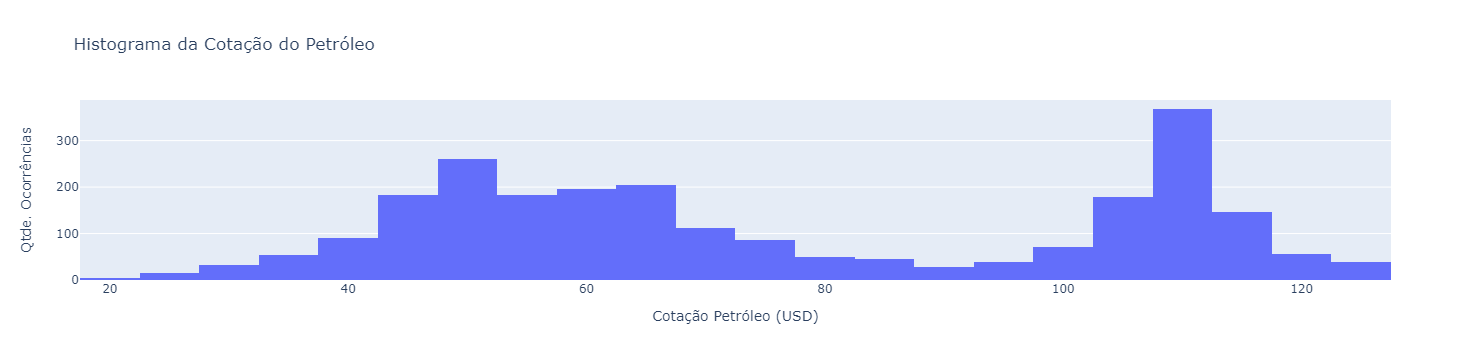

In [108]:
#Verificando range de valores
fig = px.histogram(df, x="PETROLEO", title='Histograma da Cotação do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação Petróleo (USD)")
fig.show()

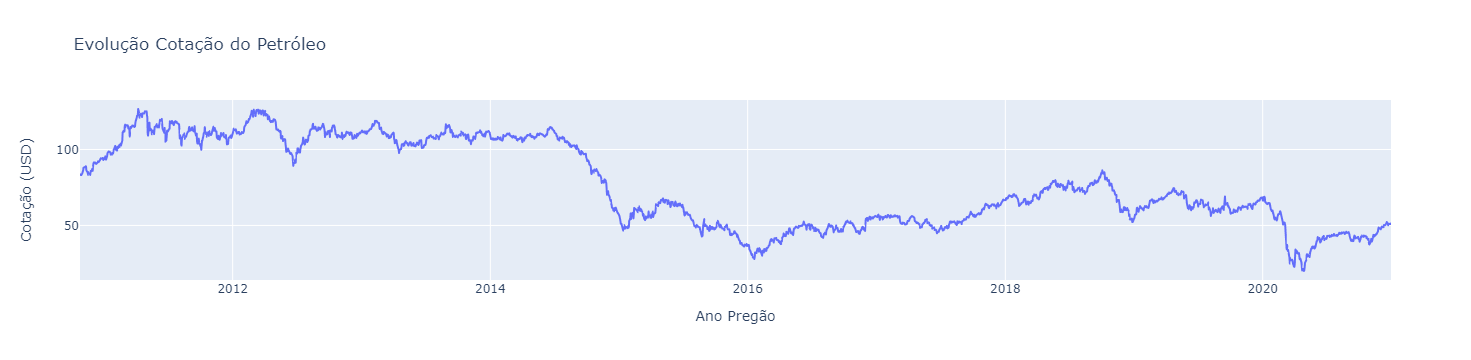

In [109]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="PETROLEO", title='Evolução Cotação do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Cotação (USD)", xaxis_title="Ano Pregão")
fig.show()

#### FERRO

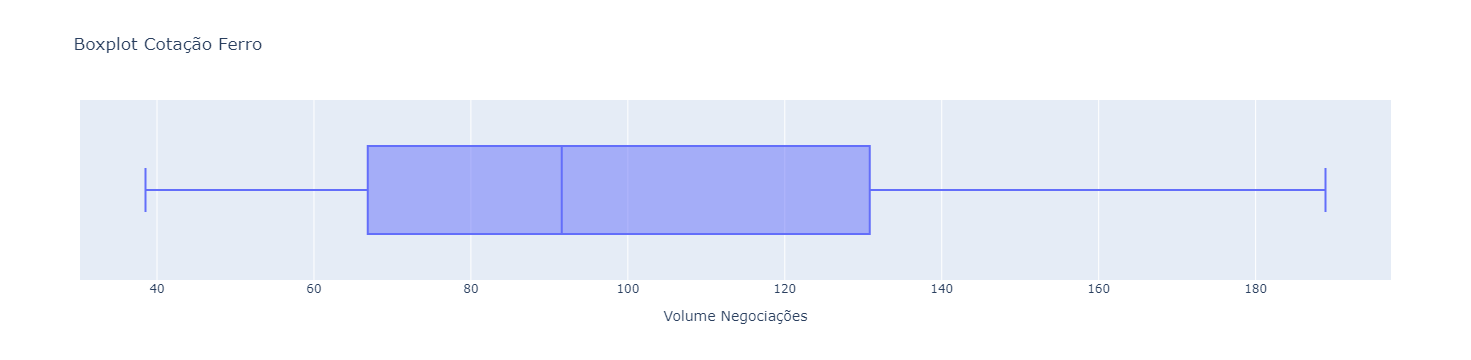

In [110]:
fig = px.box(df, x="FERRO", title="Boxplot Cotação Ferro")
fig.update_layout(showlegend=True, xaxis_title="Volume Negociações")
fig.show()

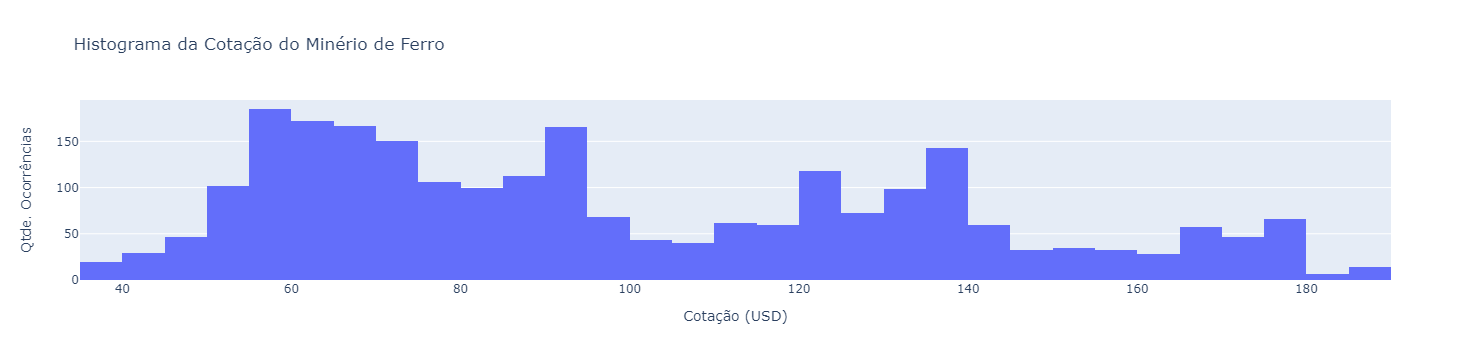

In [111]:
#Verificando range de valores
fig = px.histogram(df, x="FERRO", title='Histograma da Cotação do Minério de Ferro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (USD)")
fig.show()

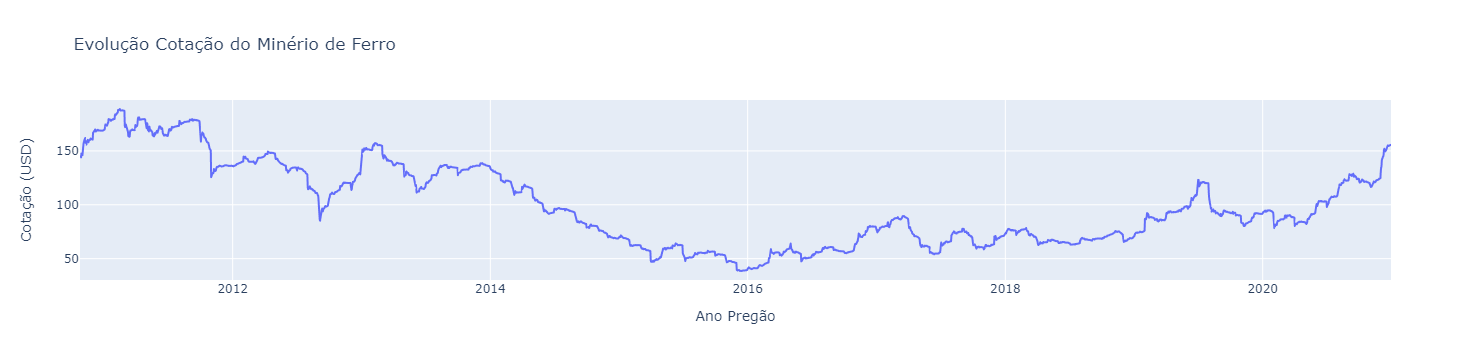

In [112]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="FERRO", title='Evolução Cotação do Minério de Ferro')
fig.update_layout(showlegend=True, yaxis_title="Cotação (USD)", xaxis_title="Ano Pregão")
fig.show()

#### DOLAR

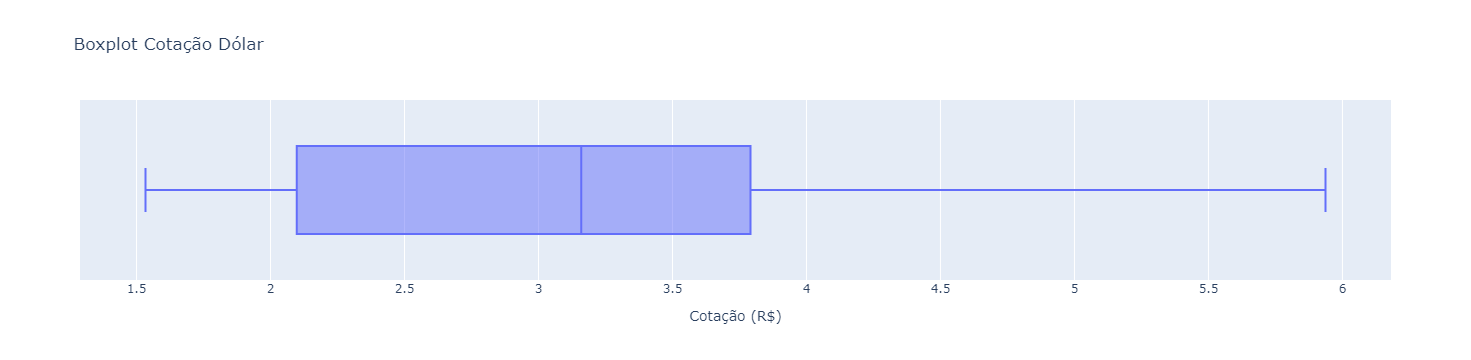

In [113]:
fig = px.box(df, x="DOLAR", title="Boxplot Cotação Dólar")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

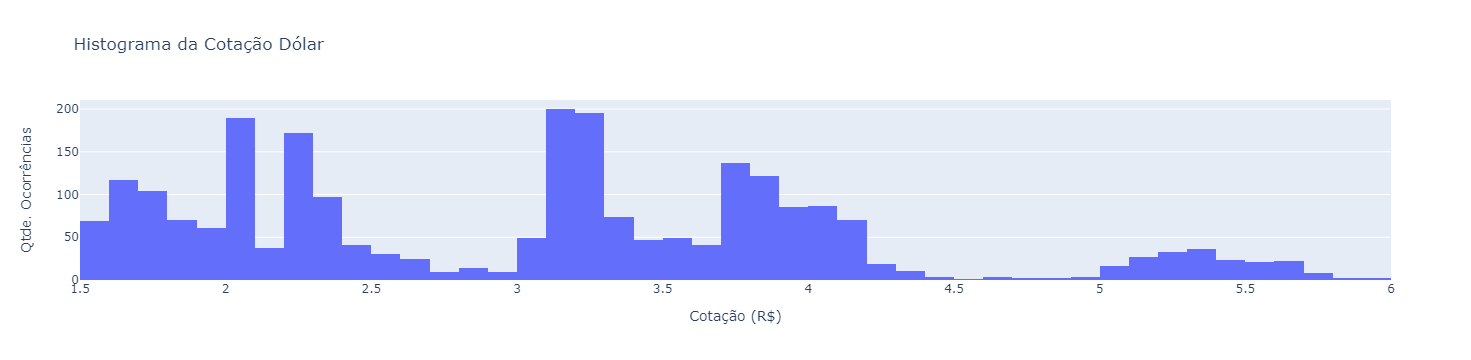

In [114]:
#Verificando range de valores
fig = px.histogram(df, x="DOLAR", title='Histograma da Cotação Dólar')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

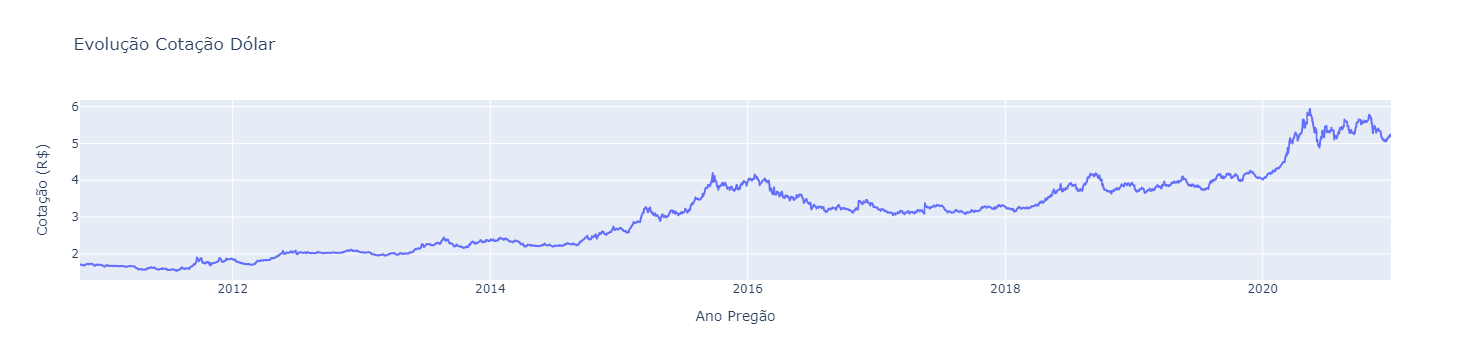

In [115]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="DOLAR", title='Evolução Cotação Dólar')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Ano Pregão")
fig.show()

#### SELIC

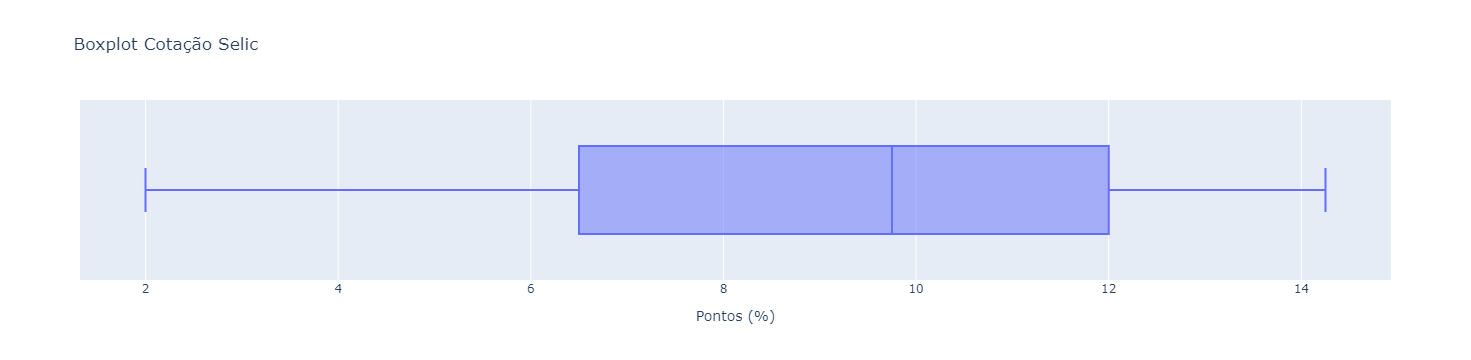

In [116]:
fig = px.box(df, x="SELIC", title="Boxplot Cotação Selic")
fig.update_layout(showlegend=True, xaxis_title="Pontos (%)")
fig.show()

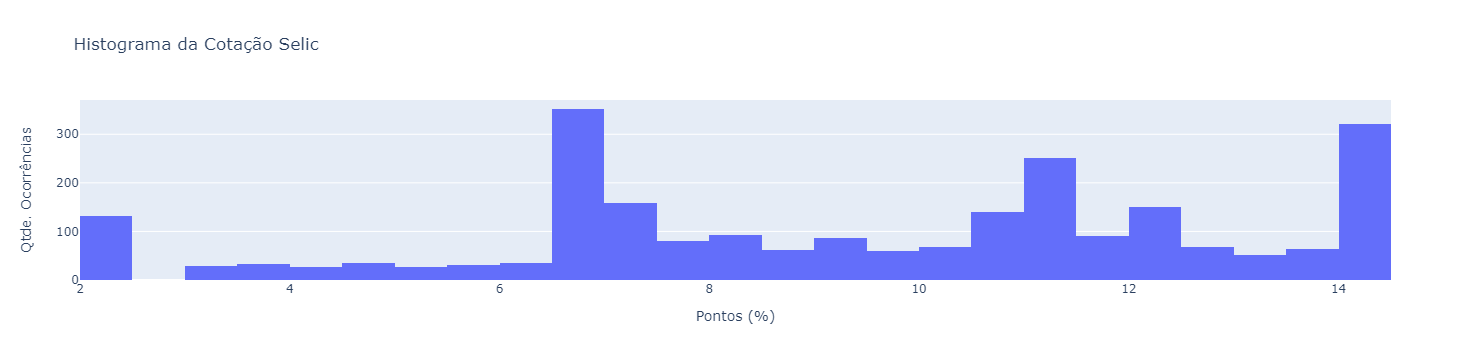

In [117]:
#Verificando range de valores
fig = px.histogram(df, x="SELIC", title='Histograma da Cotação Selic')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos (%)")
fig.show()

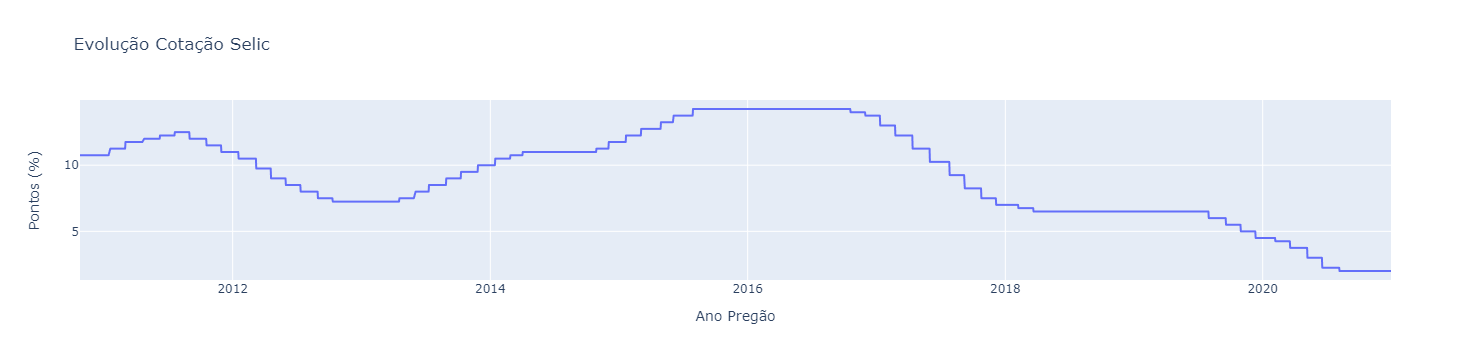

In [118]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="SELIC", title='Evolução Cotação Selic')
fig.update_layout(showlegend=True, yaxis_title="Pontos (%)", xaxis_title="Ano Pregão")
fig.show()

#### VALE

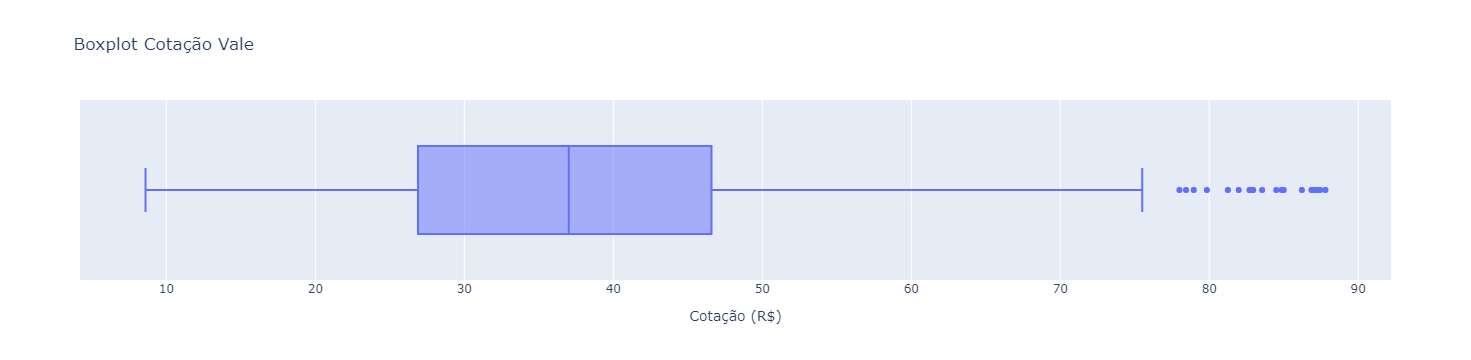

In [119]:
fig = px.box(df, x="VALE", title="Boxplot Cotação Vale")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

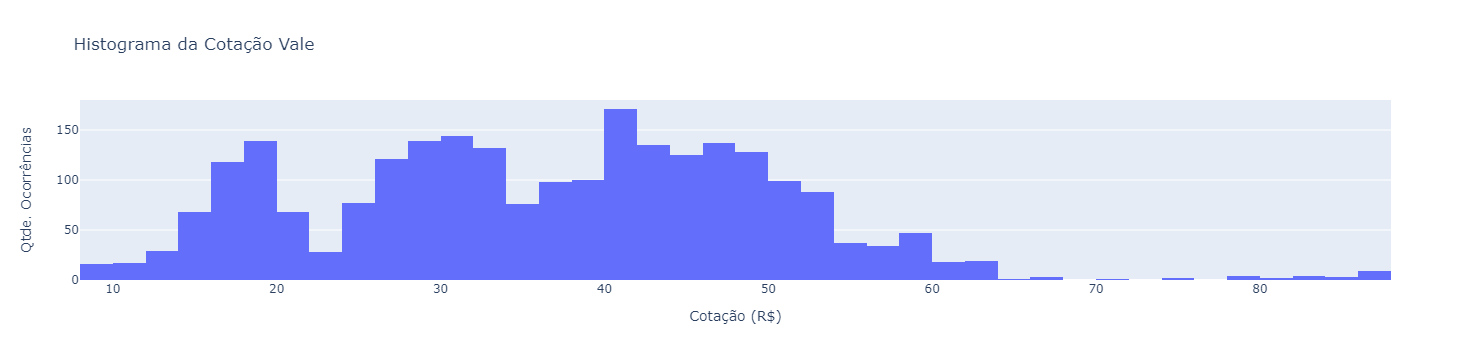

In [120]:
#Verificando range de valores
fig = px.histogram(df, x="VALE", title='Histograma da Cotação Vale')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

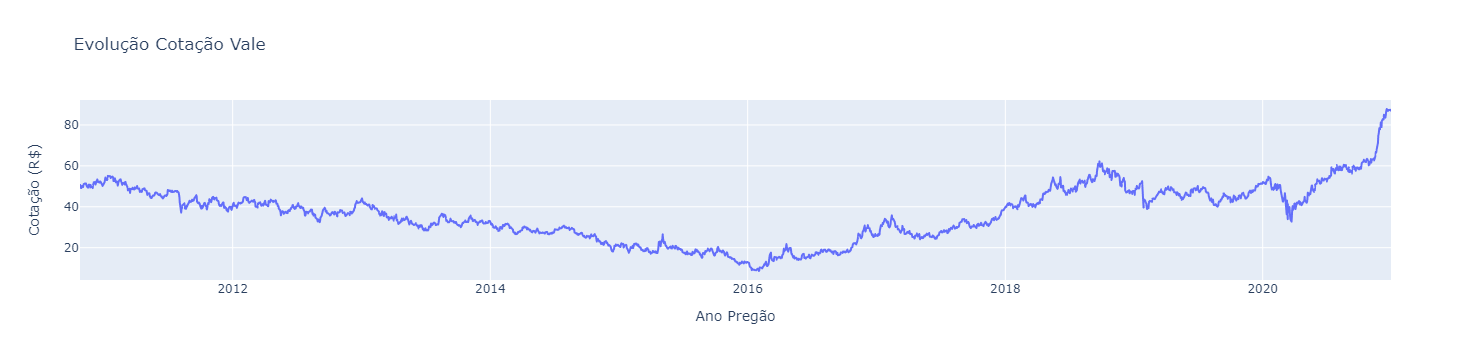

In [121]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="VALE", title='Evolução Cotação Vale')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Ano Pregão")
fig.show()

In [122]:
np.unique(df.query("VALE > 75.50").index.year), np.unique(df.query("VALE > 75.50").index), np.count_nonzero(np.unique(df.query("VALE > 75.50").index.date))

(array([2020], dtype=int64),
 array(['2020-11-27T00:00:00.000000000', '2020-11-30T00:00:00.000000000',
        '2020-12-01T00:00:00.000000000', '2020-12-02T00:00:00.000000000',
        '2020-12-03T00:00:00.000000000', '2020-12-04T00:00:00.000000000',
        '2020-12-07T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
        '2020-12-09T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
        '2020-12-11T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
        '2020-12-15T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
        '2020-12-17T00:00:00.000000000', '2020-12-18T00:00:00.000000000',
        '2020-12-21T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
        '2020-12-23T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
        '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 22)

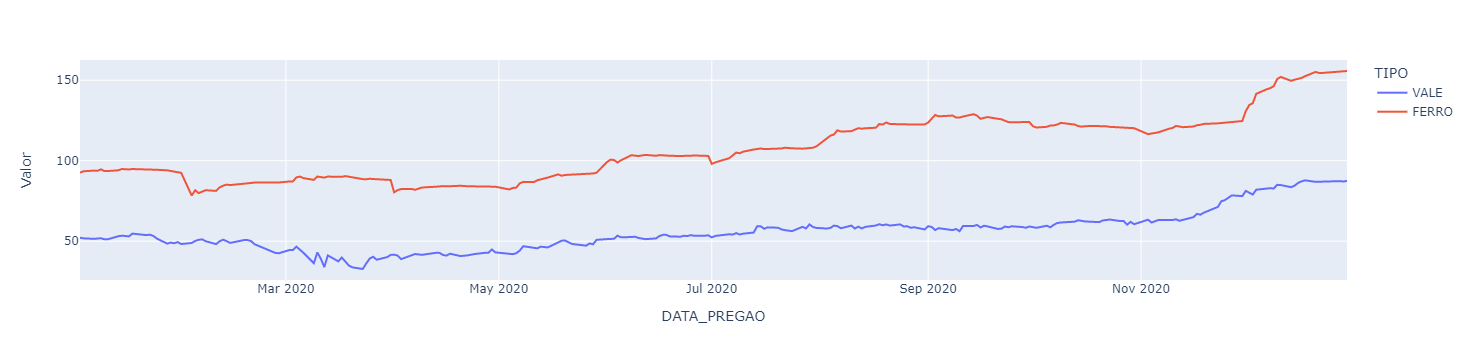

In [123]:
#Mostrando a relação entre o minério de ferro e a ação da Vale
df_vale_ferro = df.loc[(df.index >= '2020-01-01') & (df.index < '2021-04-10')]
df_vale_ferro.reset_index(inplace=True)
df_vale_ferro = pd.melt(df_vale_ferro, id_vars=['DATA_PREGAO'], value_vars=['VALE', 'FERRO']) 
df_vale_ferro.rename(columns={'variable' : 'TIPO', 'value' : 'Valor'}, inplace = True)
df_vale_ferro.set_index('DATA_PREGAO', inplace=True)
fig = px.line(df_vale_ferro, x=df_vale_ferro.index, y="Valor", color='TIPO')
fig.show()

### Correlação Ações com Fatores de influência

In [124]:
corr_vale = vale.join(dolar)
corr_vale = corr_vale.join(ferro)
corr_vale = corr_vale.join(itub)
corr_vale = corr_vale.join(petr4)
corr_vale = corr_vale.join(petroleo)
corr_vale = corr_vale.join(bbdc4)
corr_vale = corr_vale.join(b3)
corr_vale = corr_vale.join(bovespa)

corr_vale['PETROLEO'] = corr_vale.PETROLEO * corr_vale.DOLAR
corr_vale['FERRO'] = corr_vale.FERRO * corr_vale.DOLAR

corr_vale = corr_vale.loc[(corr_vale.index >= '2020-07-01') & (corr_vale.index < '2020-12-31')]
corr_vale = corr_vale.dropna()

corr_vale.corr()

VALE     DOLAR     FERRO      ITUB     PETR4  PETROLEO  \
VALE      1.000000 -0.502922  0.741710  0.798369  0.812443  0.735160   
DOLAR    -0.502922  1.000000 -0.037041 -0.737802 -0.797275 -0.238771   
FERRO     0.741710 -0.037041  1.000000  0.268568  0.412481  0.593472   
ITUB      0.798369 -0.737802  0.268568  1.000000  0.885686  0.559499   
PETR4     0.812443 -0.797275  0.412481  0.885686  1.000000  0.701096   
PETROLEO  0.735160 -0.238771  0.593472  0.559499  0.701096  1.000000   
BBDC4     0.855962 -0.701989  0.393959  0.979478  0.895834  0.611756   
B3        0.050407 -0.521064 -0.235634  0.299863  0.422640  0.232457   
BOVESPA   0.901755 -0.725335  0.513797  0.922201  0.946888  0.714427   

             BBDC4        B3   BOVESPA  
VALE      0.855962  0.050407  0.901755  
DOLAR    -0.701989 -0.521064 -0.725335  
FERRO     0.393959 -0.235634  0.513797  
ITUB      0.979478  0.299863  0.922201  
PETR4     0.895834  0.422640  0.946888  
PETROLEO  0.611756  0.232457  0.714427  
BBDC4     1.000000  0.263087  0.954864  
B3        0.263087  1.000000  0.373091  
BOVESPA   0.954864  0.373091  1.000000

<AxesSubplot:>

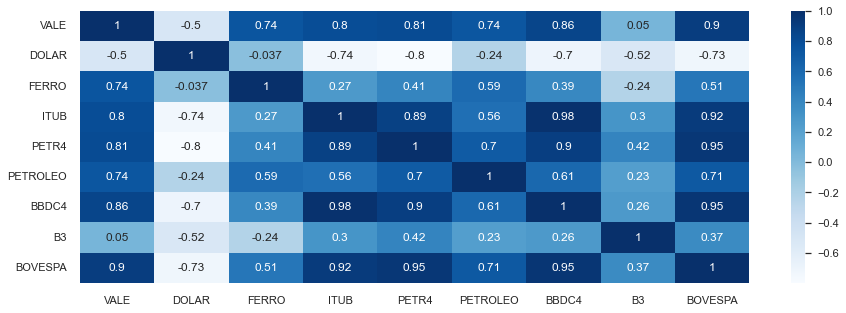

In [125]:
sns.heatmap(corr_vale.corr(), annot=True, cmap="Blues" )

C:\Users\RAFAEL~2\AppData\Local\Temp/ipykernel_28864/3442645601.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\RAFAEL~2\AppData\Local\Temp/ipykernel_28864/3442645601.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

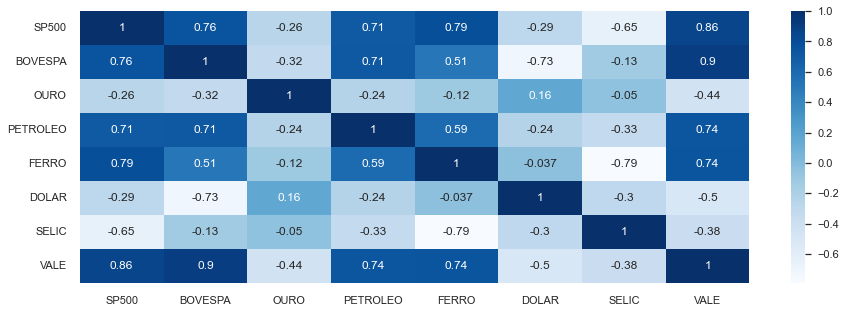

In [126]:
df_corr = df.loc[(df.index >= '2020-07-01') & (df.index < '2020-12-31')]
df_corr['PETROLEO'] = df_corr.PETROLEO * df_corr.DOLAR
df_corr['FERRO'] = df_corr.FERRO * df_corr.DOLAR
sns.heatmap(df_corr.corr(), annot=True, cmap="Blues")

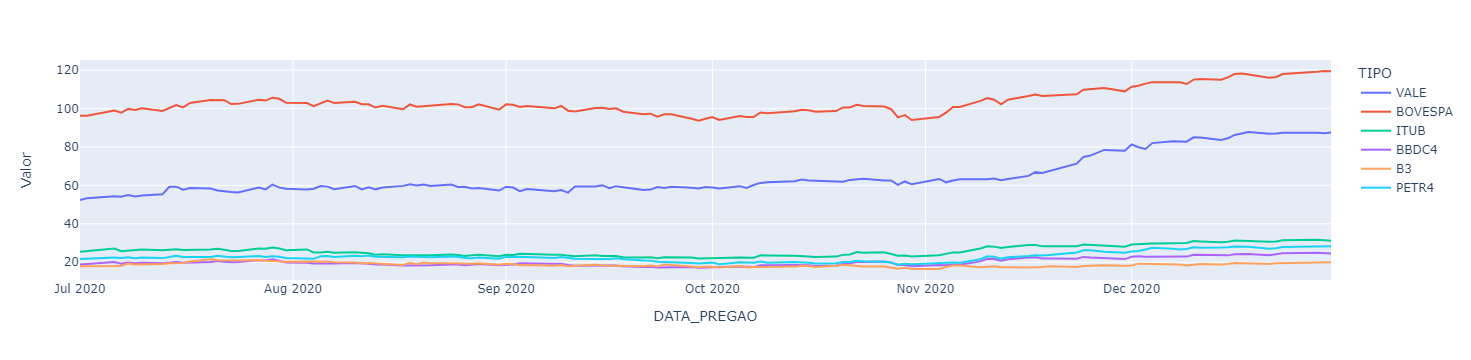

In [127]:
corr_vale.reset_index(inplace=True)
corr_vale['BOVESPA'] = corr_vale.BOVESPA/1000
df_corr = pd.melt(corr_vale, id_vars=['DATA_PREGAO'], value_vars=['VALE', 'BOVESPA', 'ITUB', 'BBDC4', 'B3', 'PETR4']) 
df_corr.rename(columns={'variable' : 'TIPO', 'value' : 'Valor'}, inplace = True)
df_corr.set_index('DATA_PREGAO', inplace=True)
fig = px.line(df_corr, x=df_corr.index, y="Valor", color='TIPO')
fig.show()

## Feature engineering

### Métricas para cálculo

In [128]:
#Criando médias móveis para os dados
df['SP500_MM_30'] = df.SP500.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()
df['OURO_MM_30'] = df.OURO.rolling(30).mean().shift()
df['PETROLEO_MM_30'] = df.PETROLEO.rolling(30).mean().shift()
df['FERRO_MM_30'] = df.FERRO.rolling(30).mean().shift()
df['DOLAR_MM_30'] = df.DOLAR.rolling(30).mean().shift()
df['SELIC_MM_30'] = df.SELIC.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()
df['VALE_MM_30'] = df.VALE.rolling(30).mean().shift()

#Setar o fechamento do dia anterior
df['SP500_FECHAMENTO_ANTERIOR'] = df.SP500.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)
df['OURO_FECHAMENTO_ANTERIOR'] = df.OURO.shift(1)
df['PETROLEO_FECHAMENTO_ANTERIOR'] = df.PETROLEO.shift(1)
df['FERRO_FECHAMENTO_ANTERIOR'] = df.FERRO.shift(1)
df['DOLAR_FECHAMENTO_ANTERIOR'] = df.DOLAR.shift(1)
df['SELIC_FECHAMENTO_ANTERIOR'] = df.SELIC.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)
df['VALE_FECHAMENTO_ANTERIOR'] = df.VALE.shift(1)

In [129]:
#Para setar o resultado esperado criaremos estas variáveis para verificação
df['SP500_RESULT_30'] = df.SP500.shift(-30)
df['BOVESPA_RESULT_30'] = df.BOVESPA.shift(-30)
df['OURO_RESULT_30'] = df.OURO.shift(-30)
df['PETROLEO_RESULT_30'] = df.PETROLEO.shift(-30)
df['FERRO_RESULT_30'] = df.FERRO.shift(-30)
df['DOLAR_RESULT_30'] = df.DOLAR.shift(-30)
df['SELIC_RESULT_30'] = df.SELIC.shift(-30)
df['VALE_RESULT_30'] = df.VALE.shift(-30)

#Criando métricas condicionais para medir o retorno mínimo esperado e o maior retorno dentre os pilares de investimento
df['SP500_RESULT_DIFF'] = ((df.SP500_RESULT_30 / df.SP500_FECHAMENTO_ANTERIOR) - 1) * 100
df['BOVESPA_RESULT_DIFF'] = ((df.BOVESPA_RESULT_30 / df.BOVESPA_FECHAMENTO_ANTERIOR) - 1) * 100
df['OURO_RESULT_DIFF'] = ((df.OURO_RESULT_30 / df.OURO_FECHAMENTO_ANTERIOR) - 1) * 100
df['DOLAR_RESULT_DIFF'] = ((df.DOLAR_RESULT_30 / df.DOLAR_FECHAMENTO_ANTERIOR) - 1) * 100
df['SELIC_RESULT_DIFF'] = ((df.SELIC_RESULT_30 / df.SELIC_FECHAMENTO_ANTERIOR) - 1) * 100
df['VALE_RESULT_DIFF'] = ((df.VALE_RESULT_30 / df.VALE_FECHAMENTO_ANTERIOR) - 1) * 100

In [130]:
#Devido à inclusão das métricas acima, algumas colunas apresentarão os dados nulos para os primeiros 30 registros e para outras colunas nos últimos registros 
df.isnull().values.any(), df.shape

(True, (2437, 38))

In [131]:
#Faremos a exclusão delas
df = df.dropna()

In [132]:
df.shape

(2377, 38)

### Calculando o resultado esperado
0 - Não fazer nada
1 - Aplicar no índice Bovespa
2 - Aplicar em Dólar
3 - Aplicar em Ouro
4 - Aplicar em Selic
5 - ETF SP&500
6 - Ações (VALE)

In [133]:
# Gerar a métrica de resultados de acordo com os itens que foram definidos
condicoes = [    
(df['BOVESPA_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) 
    & (df['BOVESPA_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) 
    & (df['BOVESPA_RESULT_DIFF'] > df['VALE_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > 5)
, (df['DOLAR_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF'])
    & (df['DOLAR_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) 
    & (df['DOLAR_RESULT_DIFF'] > df['VALE_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > 5)
, (df['OURO_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) 
    & (df['OURO_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) 
    & (df['OURO_RESULT_DIFF'] > df['VALE_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > 5)
, (df['SELIC_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) 
    & (df['SELIC_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) 
    & (df['SELIC_RESULT_DIFF'] > df['VALE_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > 5)
, (df['SP500_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) 
    & (df['SP500_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) 
    & (df['SP500_RESULT_DIFF'] > df['VALE_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > 5)
, (df['VALE_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['VALE_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) 
    & (df['VALE_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['VALE_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) 
    & (df['VALE_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['VALE_RESULT_DIFF'] > 5)
]

valores = [1, 2, 3, 4, 5, 6]
descritivos_target = ['NÃO FAZER NADA','ÍNDICE BOVESPA','DÓLAR','OURO','SELIC','SP&500', 'ACAO']

df['RESULTADO'] = 0
df['RESULTADO'] = np.select(condicoes, valores)

C:\Users\RAFAEL~2\AppData\Local\Temp/ipykernel_28864/2634132470.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\RAFAEL~2\AppData\Local\Temp/ipykernel_28864/2634132470.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
#Validação da distribuição do Target
df_count_acao = df['RESULTADO'].value_counts().to_frame()
df_count_acao.reset_index(inplace=True)
df_count_acao['ACAO'] = df_count_acao['index'].apply(lambda x: descritivos_target[x])
total = df_count_acao.RESULTADO.sum()
df_count_acao['SHARE'] = df_count_acao['RESULTADO'].apply(lambda x: (x/total)*100)
df_count_acao, total

(   index  RESULTADO            ACAO      SHARE
 0      6        602            ACAO  25.326041
 1      0        567  NÃO FAZER NADA  23.853597
 2      2        425           DÓLAR  17.879680
 3      1        343  ÍNDICE BOVESPA  14.429954
 4      3        215            OURO   9.045015
 5      5        152          SP&500   6.394615
 6      4         73           SELIC   3.071098,
 2377)

In [135]:
#Primeiro arquivo de saída gerado para conferência
df.to_csv('saida/00_conferência.csv')

In [136]:
df.columns

Index(['SP500', 'BOVESPA', 'OURO', 'PETROLEO', 'FERRO', 'DOLAR', 'SELIC',
       'VALE', 'SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
       'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30', 'VALE_MM_30',
       'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
       'OURO_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
       'FERRO_FECHAMENTO_ANTERIOR', 'DOLAR_FECHAMENTO_ANTERIOR',
       'SELIC_FECHAMENTO_ANTERIOR', 'VALE_FECHAMENTO_ANTERIOR',
       'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'OURO_RESULT_30',
       'PETROLEO_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30',
       'SELIC_RESULT_30', 'VALE_RESULT_30', 'SP500_RESULT_DIFF',
       'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF',
       'SELIC_RESULT_DIFF', 'VALE_RESULT_DIFF', 'RESULTADO'],
      dtype='object')

In [137]:
#Apagando colunas utilizadas para calcular o resultado e que não serão utilizadas na predição
df_predicao = df.drop(['SP500', 'BOVESPA', 'OURO', 'PETROLEO', 'FERRO', 'DOLAR', 'VALE'
                            , 'SELIC', 'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'OURO_RESULT_30'
                            , 'PETROLEO_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30'
                            , 'SELIC_RESULT_30', 'VALE_RESULT_30', 'SP500_RESULT_DIFF'
                            , 'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF'
                            , 'SELIC_RESULT_DIFF', 'VALE_RESULT_DIFF'
                      ], axis='columns')

In [138]:
df_predicao.reset_index(inplace=True)

In [139]:
df_predicao.drop('DATA_PREGAO', axis='columns', inplace=True)

In [140]:
#Comparando as colunas dos dataframes mostrando as colunas a serem utilizadas para a predição
df.columns, df_predicao.columns

(Index(['SP500', 'BOVESPA', 'OURO', 'PETROLEO', 'FERRO', 'DOLAR', 'SELIC',
        'VALE', 'SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
        'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30', 'VALE_MM_30',
        'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
        'OURO_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
        'FERRO_FECHAMENTO_ANTERIOR', 'DOLAR_FECHAMENTO_ANTERIOR',
        'SELIC_FECHAMENTO_ANTERIOR', 'VALE_FECHAMENTO_ANTERIOR',
        'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'OURO_RESULT_30',
        'PETROLEO_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30',
        'SELIC_RESULT_30', 'VALE_RESULT_30', 'SP500_RESULT_DIFF',
        'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF',
        'SELIC_RESULT_DIFF', 'VALE_RESULT_DIFF', 'RESULTADO'],
       dtype='object'),
 Index(['SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
        'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30', 'VALE_MM_30',
        'SP50

In [141]:
#Setando colunas usadas para a predição
descritivos_fatores = df_predicao.columns.to_list()[0:-1]
len(descritivos_fatores)

16

In [142]:
#Exportar dataframes para validação no excel
df.to_csv('saida/04_saida_total.csv')
df_predicao.to_csv('saida/04_saida_predicao.csv')

## Submissão aos algorítmos

### Separação de Dados e Target

In [143]:
df_predicao.columns

Index(['SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
       'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30', 'VALE_MM_30',
       'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
       'OURO_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
       'FERRO_FECHAMENTO_ANTERIOR', 'DOLAR_FECHAMENTO_ANTERIOR',
       'SELIC_FECHAMENTO_ANTERIOR', 'VALE_FECHAMENTO_ANTERIOR', 'RESULTADO'],
      dtype='object')

In [144]:
df_predicao.describe()

SP500_MM_30  BOVESPA_MM_30   OURO_MM_30  PETROLEO_MM_30  FERRO_MM_30  \
count  2377.000000    2377.000000  2377.000000     2377.000000  2377.000000   
mean   2133.820212   67201.236545  1439.012704       76.917179    98.157980   
std     611.473687   18282.858657   183.143321       27.704380    37.587082   
min    1170.328667   39858.266667  1128.000008       26.620000    39.680334   
25%    1628.161333   53759.800000  1308.950000       52.693667    66.226999   
50%    2073.238000   60660.633333  1371.613330       67.587000    88.620333   
75%    2685.463000   77921.266667  1570.510002      108.374666   130.550333   
max    3429.228667  116503.833333  2000.586654      124.354334   183.553334   

       DOLAR_MM_30  SELIC_MM_30   VALE_MM_30  SP500_FECHAMENTO_ANTERIOR  \
count  2377.000000  2377.000000  2377.000000                2377.000000   
mean      3.035613     9.455248    35.678087                2147.495402   
std       1.010455     3.339295    12.374956                 617.948114   
min       1.568523     2.000000    10.148000                1099.230000   
25%       2.079050     6.500000    27.053333                1634.960000   
50%       3.147110     9.866667    36.856000                2081.240000   
75%       3.805977    12.083333    45.740667                2690.730000   
max       5.620577    14.250000    61.580666                3580.840000   

       BOVESPA_FECHAMENTO_ANTERIOR  OURO_FECHAMENTO_ANTERIOR  \
count                  2377.000000               2377.000000   
mean                  67383.449306               1442.317871   
std                   18642.039953                189.939285   
min                   37497.000000               1108.099976   
25%                   53519.000000               1305.800049   
50%                   61087.000000               1378.099976   
75%                   78602.000000               1574.599976   
max                  119528.000000               2103.199951   

       PETROLEO_FECHAMENTO_ANTERIOR  FERRO_FECHAMENTO_ANTERIOR  \
count                   2377.000000                2377.000000   
mean                      76.636742                  97.905014   
std                       28.014870                  37.554844   
min                       19.990000                  38.540001   
25%                       52.180000                  66.269997   
50%                       67.540001                  89.970001   
75%                      107.730003                 128.460007   
max                      126.650002                 188.899994   

       DOLAR_FECHAMENTO_ANTERIOR  SELIC_FECHAMENTO_ANTERIOR  \
count                2377.000000                2377.000000   
mean                    3.059237                   9.401872   
std                     1.027558                   3.392603   
min                     1.533700                   2.000000   
25%                     2.150100                   6.500000   
50%                     3.159600                   9.750000   
75%                     3.775600                  12.000000   
max                     5.936600                  14.250000   

       VALE_FECHAMENTO_ANTERIOR    RESULTADO  
count               2377.000000  2377.000000  
mean                  35.749256     2.735381  
std                   12.620650     2.323985  
min                    8.600000     0.000000  
25%                   26.680000     1.000000  
50%                   36.360001     2.000000  
75%                   45.700001     6.000000  
max                   63.599998     6.000000

In [145]:
#Separando os valores do resultado
x_df_predicao = df_predicao.iloc[:,0:-1].values
y_df_predicao = df_predicao.iloc[:,16:17].values

In [146]:
x_df_predicao[0]

array([1.20111833e+03, 7.01941667e+04, 1.37113667e+03, 8.66353330e+01,
       1.58226667e+02, 1.70652999e+00, 1.07500000e+01, 5.04906667e+01,
       1.22828000e+03, 6.81750000e+04, 1.38250000e+03, 9.07699966e+01,
       1.69100006e+02, 1.68840003e+00, 1.07500000e+01, 5.08499985e+01])

In [147]:
y_df_predicao[0:10]

array([[6],
       [0],
       [0],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5]])

### Standarização dos dados

In [148]:
#Standarização dos valores
scaler_df = StandardScaler()

In [149]:
x_df_predicao [1:3]

array([[1.20269767e+03, 7.01374667e+04, 1.37293000e+03, 8.68836662e+01,
        1.58993334e+02, 1.70652333e+00, 1.07500000e+01, 5.05416667e+01,
        1.23300000e+03, 6.78790000e+04, 1.39209998e+03, 9.09899979e+01,
        1.68000000e+02, 1.70159996e+00, 1.07500000e+01, 5.14099998e+01],
       [1.20452300e+03, 7.00575333e+04, 1.37447334e+03, 8.71109996e+01,
        1.59790000e+02, 1.70676333e+00, 1.07500000e+01, 5.05896666e+01,
        1.24040000e+03, 6.83420000e+04, 1.38430005e+03, 9.04800034e+01,
        1.69000000e+02, 1.71089995e+00, 1.07500000e+01, 5.20499992e+01]])

In [150]:
x_df_predicao = scaler_df.fit_transform(x_df_predicao)

In [151]:
x_df_predicao [1:3]

array([[-1.52307203,  0.16063396, -0.36090098,  0.35981981,  1.61885814,
        -1.3156151 ,  0.38781368,  1.2013544 , -1.48020166,  0.02658802,
        -0.26444466,  0.51245195,  1.86686259, -1.32150459,  0.39745637,
         1.24114365],
       [-1.52008626,  0.156261  , -0.35247228,  0.36802721,  1.64005782,
        -1.31537754,  0.38781368,  1.20523402, -1.46822403,  0.05142959,
        -0.30551867,  0.49424369,  1.89349592, -1.31245211,  0.39745637,
         1.29186481]])

### Gerando os dados de Treinamento e Testes

In [152]:
#Gerando os dados de testes e treinamento em 30%/70%
x_df_treinamento, x_df_teste, y_df_treinamento, y_df_teste =  train_test_split(x_df_predicao, y_df_predicao, test_size = 0.30, random_state = 0)

In [153]:
x_df_treinamento.shape, y_df_treinamento.shape

((1663, 16), (1663, 1))

In [154]:
x_df_teste.shape, y_df_teste.shape

((714, 16), (714, 1))

### Aplicação dos algorítmos

#### Árvore

In [155]:
arvore_df_predicao = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_df_predicao.fit(x_df_treinamento, y_df_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [156]:
tree_df_previsores = arvore_df_predicao.predict(x_df_teste)
tree_df_previsores[:10]

array([0, 0, 2, 6, 1, 2, 0, 1, 2, 0])

In [157]:
accuracy_score(y_df_teste, tree_df_previsores)

0.788515406162465

0.788515406162465

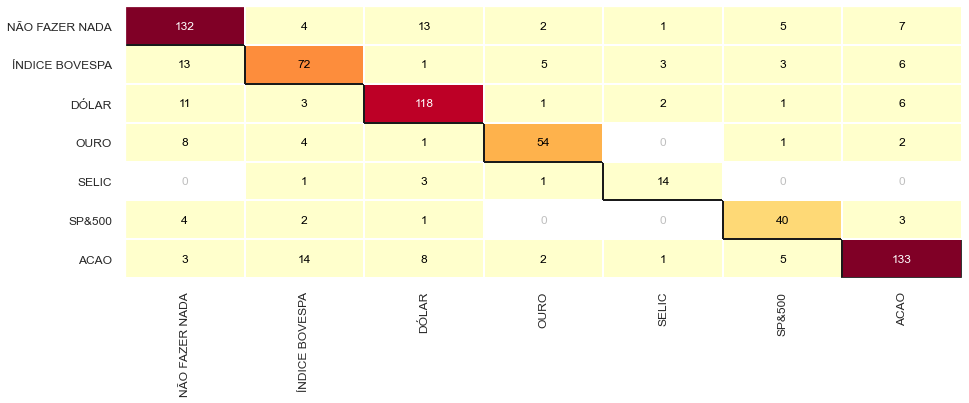

In [158]:
cm = ConfusionMatrix(arvore_df_predicao, classes=descritivos_target)
cm.fit(x_df_treinamento, y_df_treinamento)
cm.score(x_df_teste, y_df_teste)

In [159]:
print(classification_report(y_df_teste, tree_df_previsores))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       164
           1       0.72      0.70      0.71       103
           2       0.81      0.83      0.82       142
           3       0.83      0.77      0.80        70
           4       0.67      0.74      0.70        19
           5       0.73      0.80      0.76        50
           6       0.85      0.80      0.82       166

    accuracy                           0.79       714
   macro avg       0.77      0.78      0.77       714
weighted avg       0.79      0.79      0.79       714



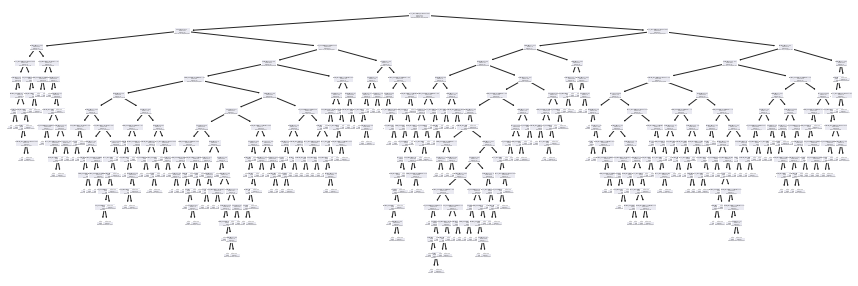

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=1)
a = tree.plot_tree(arvore_df_predicao, feature_names=descritivos_fatores)

#### KNN

In [166]:
knn_df = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1)

In [167]:
knn_df.fit(x_df_treinamento, y_df_treinamento.ravel())

KNeighborsClassifier(n_neighbors=1, p=1)

In [168]:
knn_df_previsores = knn_df.predict(x_df_teste)

In [169]:
accuracy_score(y_df_teste, knn_df_previsores)

0.8151260504201681

0.8151260504201681

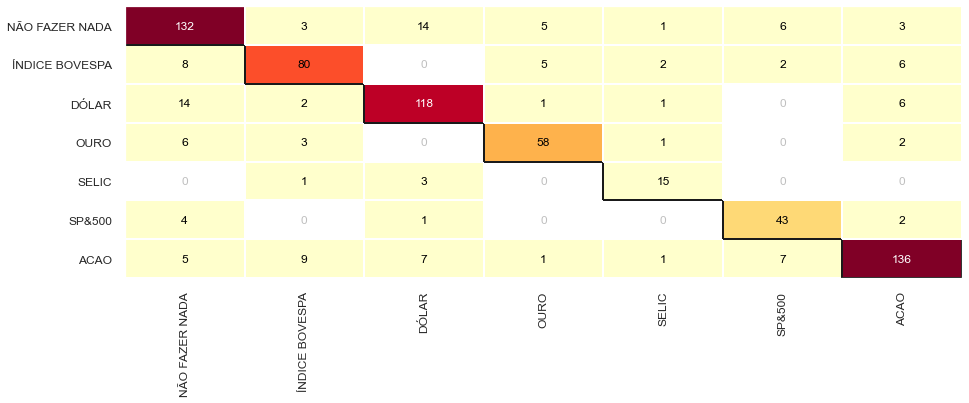

In [170]:
cm = ConfusionMatrix(knn_df, classes=descritivos_target)
cm.fit(x_df_treinamento, y_df_treinamento)
cm.score(x_df_teste, y_df_teste)

In [171]:
print(classification_report(y_df_teste, random_forest_df_previsores))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       164
           1       0.84      0.78      0.81       103
           2       0.88      0.86      0.87       142
           3       0.82      0.84      0.83        70
           4       0.70      0.74      0.72        19
           5       0.77      0.82      0.80        50
           6       0.89      0.85      0.87       166

    accuracy                           0.84       714
   macro avg       0.81      0.82      0.82       714
weighted avg       0.84      0.84      0.84       714



#### Árvore de decisão Randomica

In [161]:
random_forest_df = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_df.fit(x_df_treinamento, y_df_treinamento.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [162]:
random_forest_df_previsores = random_forest_df.predict(x_df_teste)
random_forest_df_previsores[:10]

array([0, 5, 2, 6, 1, 2, 0, 1, 2, 0])

In [163]:
accuracy_score(y_df_teste, random_forest_df_previsores)

0.8361344537815126

0.8361344537815126

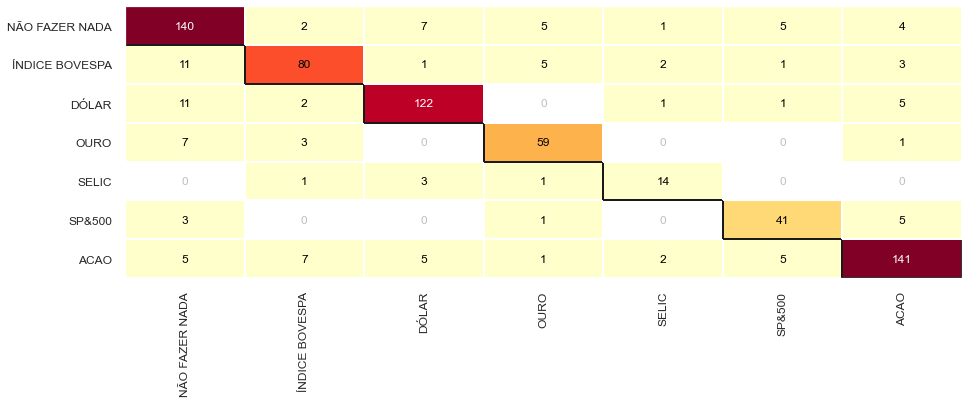

In [164]:
cm = ConfusionMatrix(random_forest_df, classes=descritivos_target)
cm.fit(x_df_treinamento, y_df_treinamento)
cm.score(x_df_teste, y_df_teste)

In [165]:
print(classification_report(y_df_teste, random_forest_df_previsores))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       164
           1       0.84      0.78      0.81       103
           2       0.88      0.86      0.87       142
           3       0.82      0.84      0.83        70
           4       0.70      0.74      0.72        19
           5       0.77      0.82      0.80        50
           6       0.89      0.85      0.87       166

    accuracy                           0.84       714
   macro avg       0.81      0.82      0.82       714
weighted avg       0.84      0.84      0.84       714

